In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

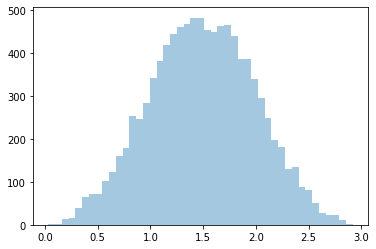

In [110]:
#1
def sampler(ls):
    sample = np.random.uniform(0, 1, len(ls))
    return np.dot(ls, sample)
sample = list()
for _ in range(10000):
    sample.append(sampler([1,1,1]))
sns.distplot(a=sample, kde=False)

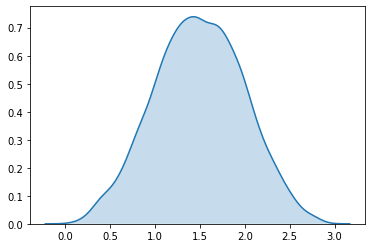

In [111]:
sns.kdeplot(data=sample, shade=True)

In [42]:
#2
tips = sns.load_dataset("tips")

In [55]:
list(tips)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [52]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [73]:
Counter(tips['sex'])

Counter({'Female': 87, 'Male': 157})

In [107]:
male_mean = tips.loc[tips['sex'] == 'Male']['total_bill'].mean()
female_mean = tips.loc[tips['sex'] == 'Female']['total_bill'].mean()
print('Средний чек у женщин: {:.3f}'.format(female_mean), 'Средний чек у мужчин: {:.3f}'.format(male_mean))
print('Разница в среднем чеке: {:.3f}'.format(abs(male_mean - female_mean)))

Средний чек у женщин: 18.057 Средний чек у мужчин: 20.744
Разница в среднем чеке: 2.687


In [91]:
weekend =  tips.loc[tips['day'].isin(['Sun', 'Sat'])]
not_weekend = tips.loc[~tips['day'].isin(['Sun', 'Sat'])]

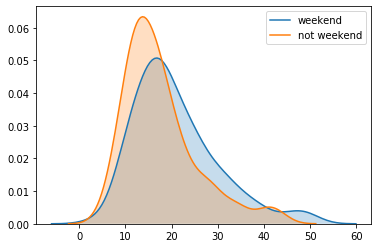

In [153]:
sns.kdeplot(data=weekend['total_bill'], shade=True, label='weekend')
sns.kdeplot(data=not_weekend['total_bill'], shade=True, label='not weekend')

In [11]:
#3
titanic = sns.load_dataset('titanic')

In [12]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
titanic["sex"] = titanic["sex"].astype('category')

In [14]:
titanic["sex_style_cat"] = titanic["sex"].cat.codes #1 - мужчина, 0 - женщина

In [15]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_style_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [17]:
survived =  titanic.loc[titanic['survived'] == 1]
dead =  titanic.loc[titanic['survived'] == 0]

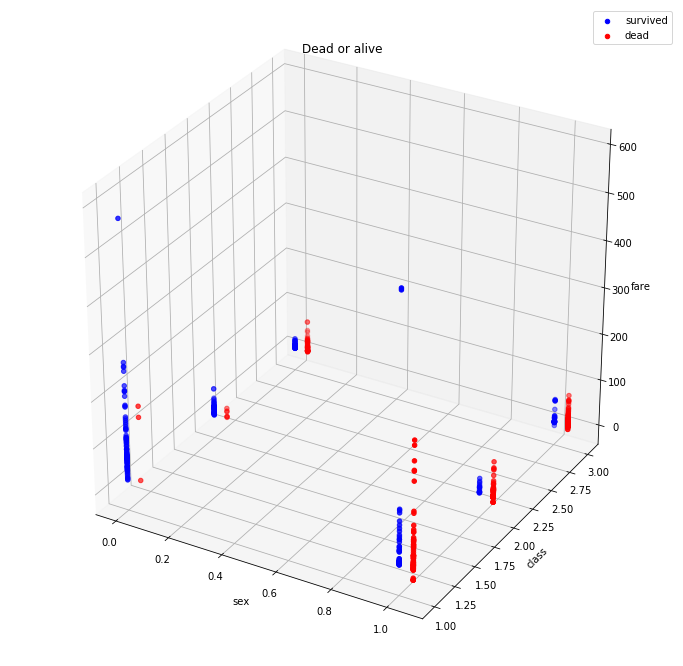

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title('Dead or alive') 
x_vals = survived['sex_style_cat']
y_vals = survived['pclass']
z_vals = survived['fare'] * np.random.normal(1, 0.1, len(survived['fare']))
nx_vals = dead['sex_style_cat'] + 0.05
ny_vals = dead['pclass']
nz_vals = dead['fare'] * np.random.normal(1, 0.1, len(dead['fare']))

ax.scatter(x_vals, y_vals, z_vals, c='b', label='survived') #синие выжившие
ax.scatter(nx_vals, ny_vals, nz_vals, c ='r', marker='o', label='dead')  #красные невыжившие
ax.set_xlabel('sex')
ax.set_ylabel('class')
ax.set_zlabel('fare')
ax.legend()
fig.set_figwidth(12) 
fig.set_figheight(12)  

plt.show()